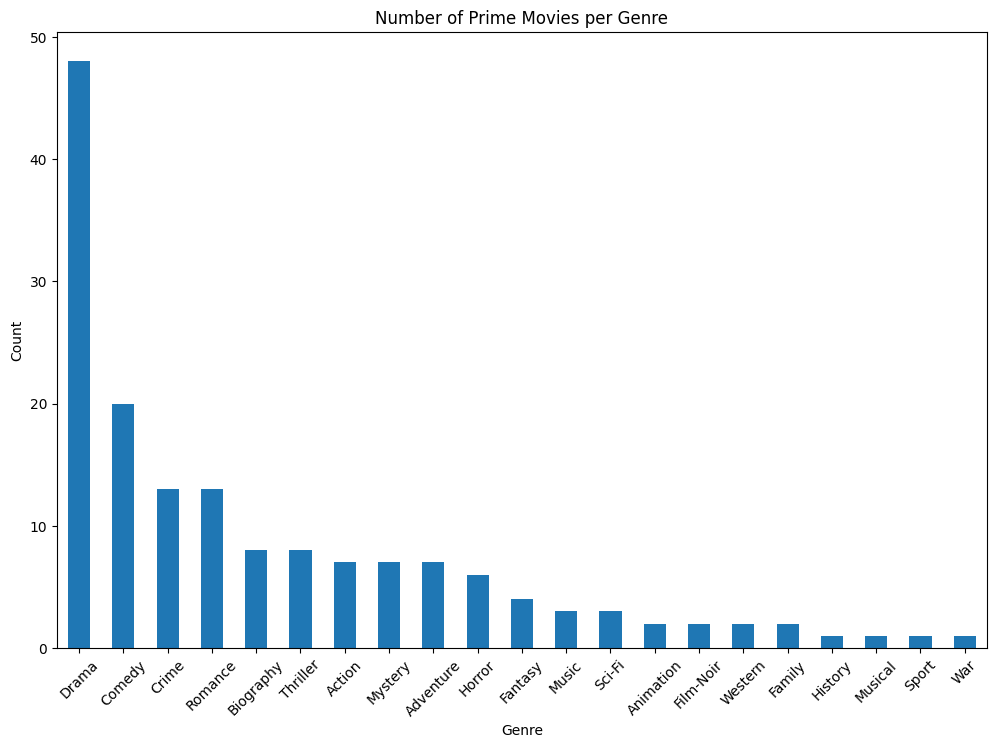

In [2]:
import pandas as pd
import numpy as np
#import csv
import matplotlib.pyplot as plt


file_path = r'C:\Users\data science\Desktop\OTT_project\raw_amazon_prime.csv'

df_prime = pd.read_csv(file_path)


file_path2 = r'C:\Users\data science\Desktop\OTT_project\imdb_top_1000.csv'
df_imdb = pd.read_csv(file_path2)

# Merge the two DataFrames based on different column names
merged_df_1 = pd.merge(df_prime, df_imdb, left_on='title', right_on='Series_Title', how='inner')
merged_df_1.to_csv(r'C:\Users\data science\Desktop\OTT_project\raw_combined_prime_imdb.csv')
             
# Split the genres on commas, then explode into separate rows
genres_exploded = merged_df_1['Genre'].str.split(', ').explode()


# Count the occurrences of each genre
genre_counts_prime = genres_exploded.value_counts()



# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as needed
genre_counts_prime.plot(kind='bar')
plt.title('Number of Prime Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the genre names for better readability
plt.show()


In [5]:

'''NETFLIX and IMDB data combined'''
merged_df_2 = pd.read_csv(r'C:\Users\data science\Desktop\OTT_project\raw_combined_netflix_imdb.csv')

genre_counts_netflix = merged_df_2['Genre'].str.split(', ').explode().value_counts()




'''Disney+ and IMDB data combined'''
merged_df_3 = pd.read_csv(r'C:\Users\data science\Desktop\OTT_project\raw_combined_disney_imdb.csv')

genre_counts_disney = merged_df_3['Genre'].str.split(', ').explode().value_counts()




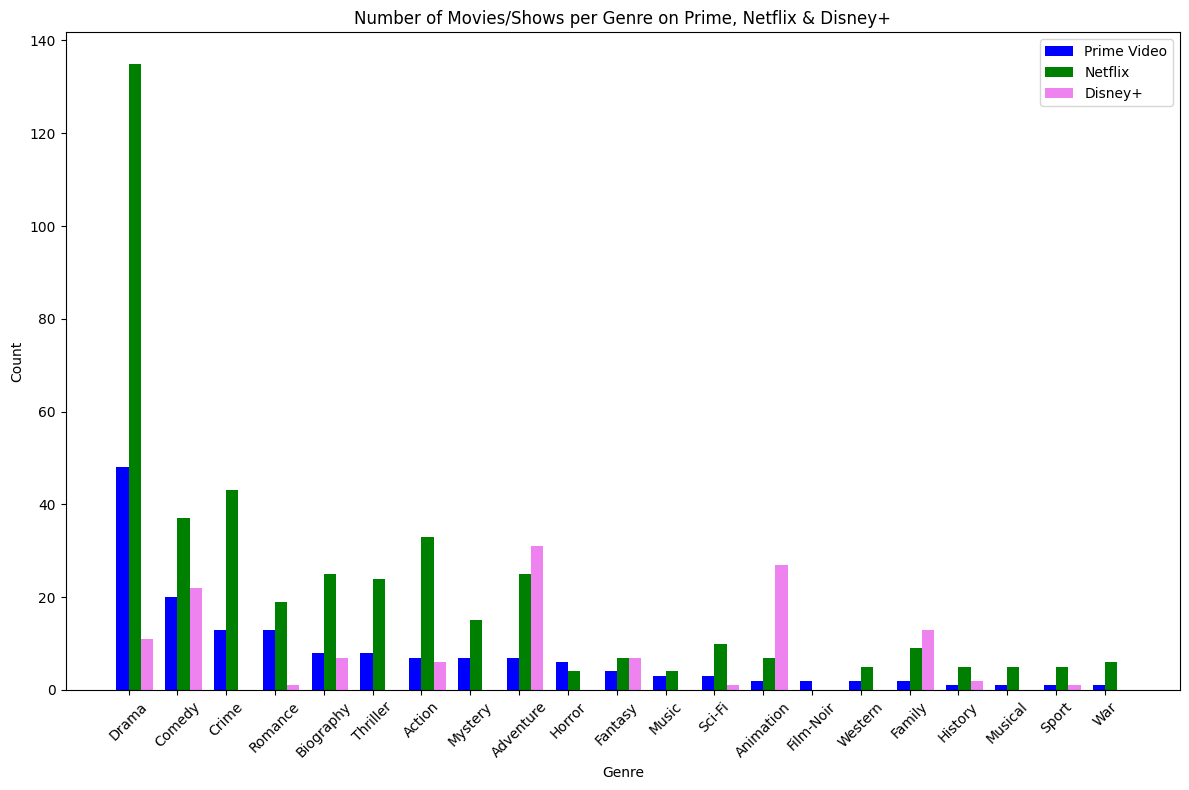

In [8]:

'''
Plotting
'''

# Set up the figure size
plt.figure(figsize=(12, 8))

# Determine the number of unique genres to set the bar positions
n_genres = len(genre_counts_prime)
index = range(n_genres)

# Bar settings
bar_width = 0.25

# Plot Prime genre counts
plt.bar(index, genre_counts_prime, bar_width, color='blue', label='Prime Video')

# Adjust the position for Netflix genre counts by adding bar_width to the index positions
index_netflix = [i + bar_width for i in index]

# Adjust index for Disneygenre counts by adding bar_width to index_netflix to place it infront of netflix bar plot
index_disney = [j + bar_width for j in index_netflix]


#plt.bar(index_netflix, genre_counts_netflix, bar_width, color='green', label='Netflix')
plt.bar(index_netflix, genre_counts_netflix.reindex(genre_counts_prime.index).fillna(0), bar_width, color='green', label='Netflix')
plt.bar(index_disney, genre_counts_disney.reindex(genre_counts_prime.index).fillna(0), bar_width, color='violet', label='Disney+')

# Add title and labels
plt.title('Number of Movies/Shows per Genre on Prime, Netflix & Disney+')
plt.xlabel('Genre')
plt.ylabel('Count')

# Add x-axis labels (genre names) and rotate them for better visibility
plt.xticks([i + bar_width / 2 for i in index], genre_counts_prime.index, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()



In [25]:
""" Merging Prime, Netflix & Disney+ data vertically"""

### An additional column 'Platform' is added which contains the name of the platform that each entry belongs to e.g. Prime, Netflix or Disney+

merged_df_1['Platform'] = 'Prime'
merged_df_2['Platform'] = 'Netflix'
merged_df_3['Platform'] = 'Disney+'

# Concatinate all the data sets verticallly

raw_combined_df = pd.concat([merged_df_1, merged_df_2, merged_df_3], ignore_index=True)


# Write the combined data set to a csv file
raw_combined_df.to_csv(r'C:\Users\data science\Desktop\OTT_project\final_Raw_combined_datasets.csv', index=False)



    Platform                  title
50     Prime     The Social Network
51     Prime     Do the Right Thing
52     Prime           The Graduate
53     Prime                  Taken
54     Prime         On Golden Pond
..       ...                    ...
196  Netflix                Platoon
197  Netflix            Primal Fear
198  Netflix           Pulp Fiction
199  Netflix            Raging Bull
200  Netflix  Rebel Without a Cause

[151 rows x 2 columns]
